In [1]:
import pandas as pd

data_folder = 'data/'
square_df = pd.read_csv(data_folder + 'square.txt', names=['x', 'y'], sep=' ')
elliptical_df = pd.read_csv(data_folder + 'elliptical.txt', names=['x', 'y'], sep=' ')

Text(0.5, 1.0, 'Elliptical')

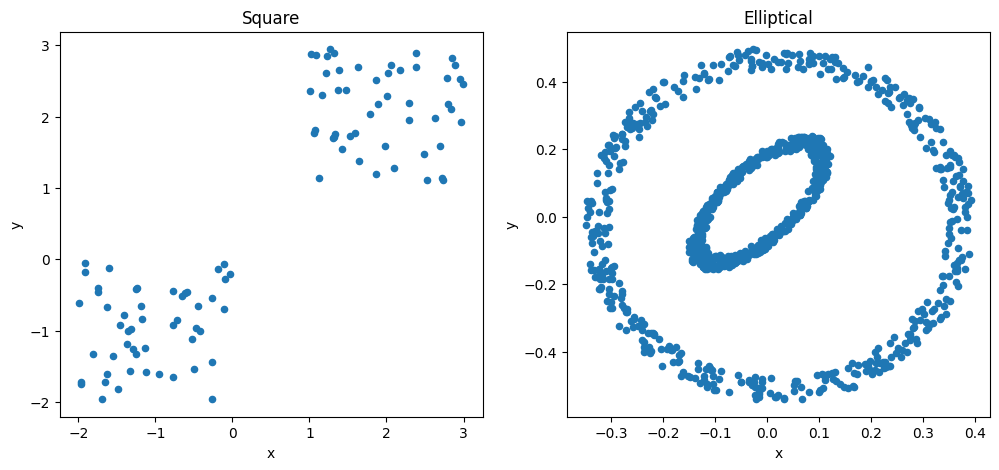

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
square_df.plot.scatter(x='x',y='y',ax=ax1)
ax1.set_title('Square')
elliptical_df.plot.scatter(x='x',y='y',ax=ax2)
ax2.set_title('Elliptical')

In [4]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
print(k_means.cluster_centers_)
k_means.fit(square_df)
print(k_means.cluster_centers_)
labels1 = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
result1 = pd.concat((square_df,labels1), axis=1)

k_means2 = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means2.fit(elliptical_df)
labels2 = pd.DataFrame(k_means2.labels_,columns=['Cluster ID'])
result2 = pd.concat((elliptical_df,labels2), axis=1)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means Clustering')
result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('K-means Clustering')

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

/home/khiem/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/khiem/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Text(0.5, 1.0, 'Spectral Clustering')

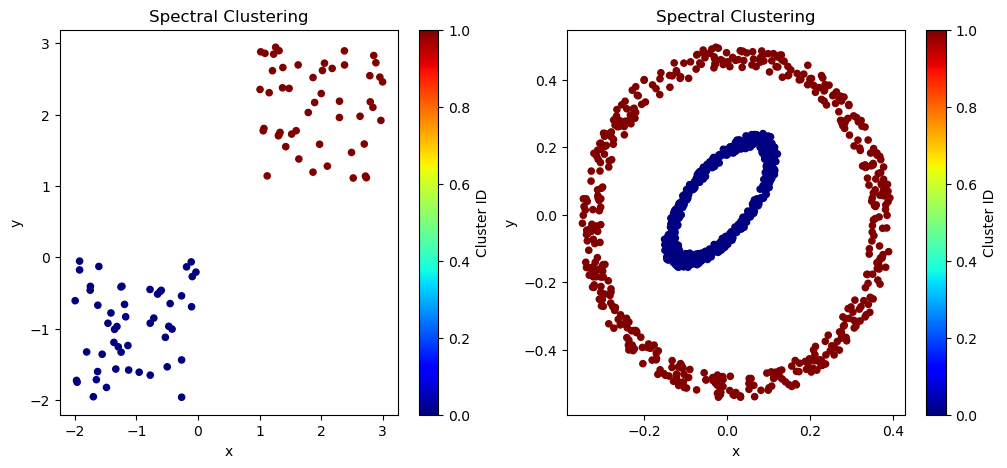

In [6]:
from sklearn import cluster
import pandas as pd

spectral = cluster.SpectralClustering(n_clusters=2,random_state=1,affinity='nearest_neighbors',n_neighbors=10)
spectral.fit(square_df)
labels1 = pd.DataFrame(spectral.labels_,columns=['Cluster ID'])
result1 = pd.concat((square_df,labels1), axis=1)

spectral2 = cluster.SpectralClustering(n_clusters=2,random_state=1,affinity='nearest_neighbors',n_neighbors=10)
spectral2.fit(elliptical_df)
labels2 = pd.DataFrame(spectral2.labels_,columns=['Cluster ID'])
result2 = pd.concat((elliptical_df,labels2), axis=1)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('Spectral Clustering')
result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('Spectral Clustering')